<a href="https://colab.research.google.com/github/Jahadul-Rakib/Deep-Learning/blob/main/ANN_Regression_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [68]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/kc_house_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [69]:
data.set_index('id', inplace=True)
data.drop('yr_built',axis=1, inplace=True)
data.drop('yr_renovated',axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)

In [70]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


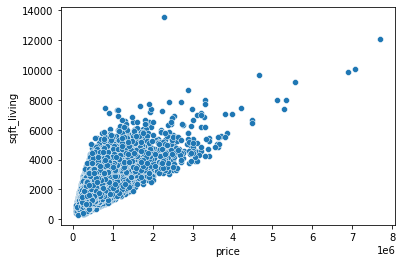

In [71]:
sbn.scatterplot(x = 'price', y = 'sqft_living', data = data)

In [72]:
x = data.drop('price', axis=1).values
y = data['price'].values

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [80]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [75]:
scaller = MinMaxScaler(feature_range=(-1, 1))
x_train = scaller.fit_transform(x_train)
x_test = scaller.fit_transform(x_test)

In [76]:
x_train.shape

(17290, 16)

In [77]:
model = Sequential()
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss ='mse')

In [78]:
model.fit(x_train,
          y_train, 
          validation_data=(x_test,y_test),
          batch_size = 128,
          epochs=400)

Epoch 1/400
136/136 [==============================] - 0s 3ms/step - loss: 426612948992.0000 - val_loss: 424287371264.0000
Epoch 2/400
136/136 [==============================] - 0s 2ms/step - loss: 392917516288.0000 - val_loss: 308040335360.0000
Epoch 3/400
136/136 [==============================] - 0s 2ms/step - loss: 182594912256.0000 - val_loss: 161816166400.0000
Epoch 4/400
136/136 [==============================] - 0s 2ms/step - loss: 145900945408.0000 - val_loss: 151923916800.0000
Epoch 5/400
136/136 [==============================] - 0s 2ms/step - loss: 135298596864.0000 - val_loss: 140734513152.0000
Epoch 6/400
136/136 [==============================] - 0s 2ms/step - loss: 121419931648.0000 - val_loss: 125204709376.0000
Epoch 7/400
136/136 [==============================] - 0s 2ms/step - loss: 103215939584.0000 - val_loss: 110294171648.0000
Epoch 8/400
136/136 [==============================] - 0s 2ms/step - loss: 81869955072.0000 - val_loss: 97037230080.0000
Epoch 9/400
136/13

In [79]:
model.save('model.h5')

In [81]:
loded_model = load_model('model.h5')